In [121]:
import pandas as pd
import numpy as np
import os
from IPython.display import Image
from scipy.stats import mode
from datetime import datetime
import json
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
# Viz lib
import matplotlib.pyplot as plt
import seaborn as sns

# Read data

In [3]:
os.chdir('T:\SalePrediction\data\sale_data\BigMartSales Prediction')
os.listdir()

['Description.png',
 'Description.txt',
 'Test.csv',
 'test_modified.csv',
 'Train.csv',
 'train_modified.csv']

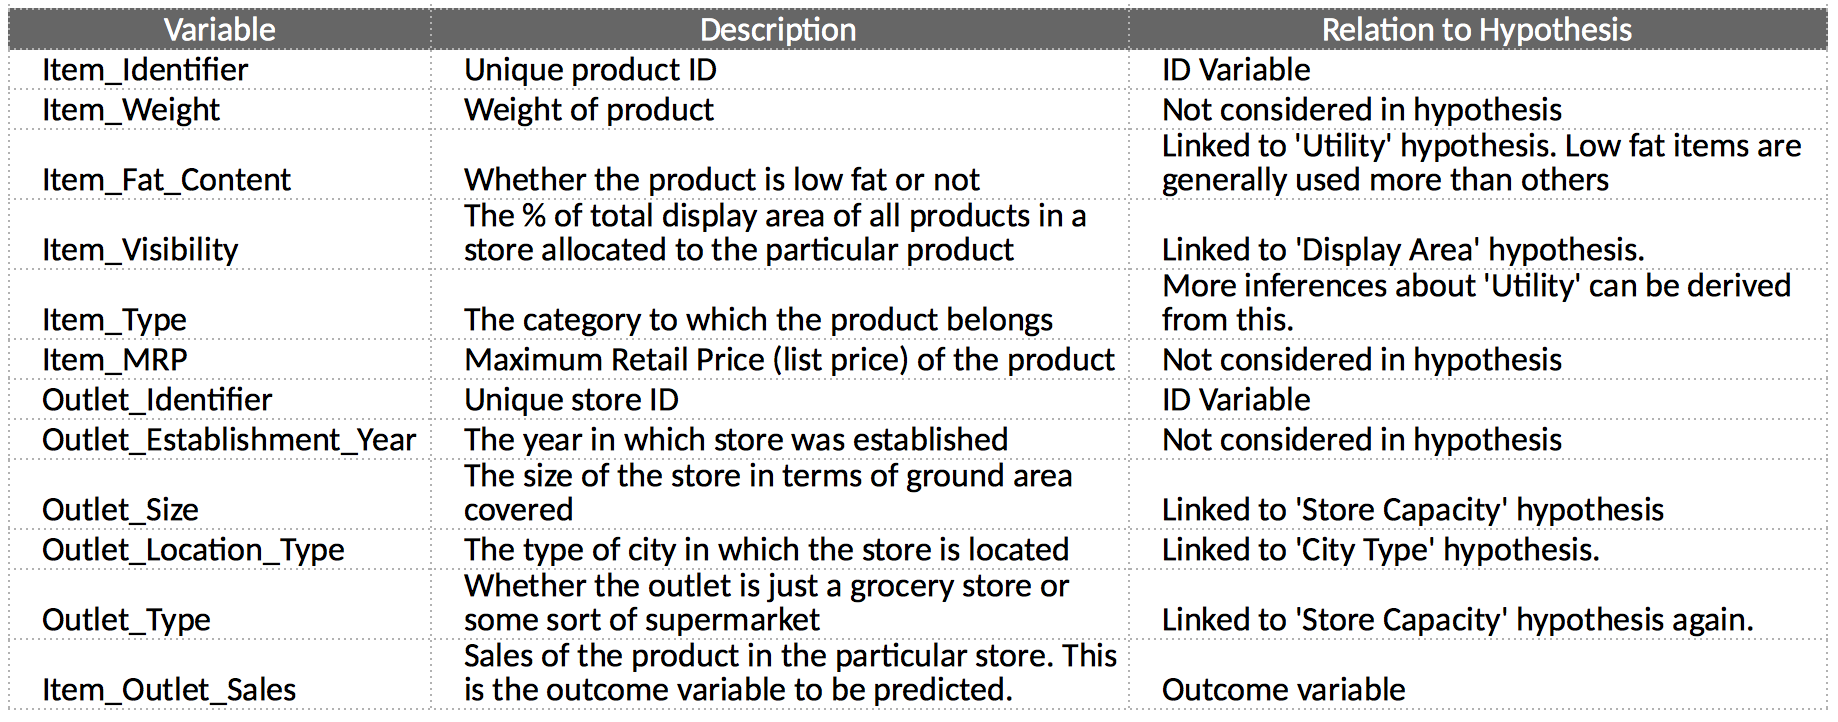

In [4]:
Image('Description.png')

In [5]:
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')
display(train_df.sample(5))
display(test_df.sample(5))

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
943,FDG45,8.10,Low Fat,0.000000,Fruits and Vegetables,211.8902,OUT018,2009,Medium,Tier 3,Supermarket Type2,3823.0236
511,FDK43,9.80,Low Fat,0.026895,Meat,128.4020,OUT045,2002,NaN,Tier 2,Supermarket Type1,2403.5380
4889,FDP01,20.75,Regular,0.063314,Breakfast,153.7682,OUT035,2004,Small,Tier 2,Supermarket Type1,1829.6184
2485,FDL22,16.85,low fat,0.036596,Snack Foods,90.6488,OUT017,2007,NaN,Tier 2,Supermarket Type1,633.8416
2126,FDQ10,12.85,Low Fat,0.033152,Snack Foods,170.6422,OUT013,1987,High,Tier 3,Supermarket Type1,2931.5174


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
2727,NCP29,NaN,Low Fat,0.196572,Health and Hygiene,63.7168,OUT019,1985,Small,Tier 1,Grocery Store
1943,FDU16,19.250,Regular,0.058512,Frozen Foods,84.2908,OUT018,2009,Medium,Tier 3,Supermarket Type2
3964,FDI14,14.100,Low Fat,0.089603,Canned,142.3496,OUT013,1987,High,Tier 3,Supermarket Type1
5132,FDJ33,8.895,reg,0.088249,Snack Foods,123.2730,OUT013,1987,High,Tier 3,Supermarket Type1
375,FDU08,10.300,Low Fat,0.027315,Fruits and Vegetables,98.7042,OUT046,1997,Small,Tier 1,Supermarket Type1


In [6]:
print(f"Shape of train data: {train_df.shape}")
print(f"Shape of test data : {test_df.shape}")

Shape of train data: (8523, 12)
Shape of test data : (5681, 11)


In [7]:
# Create source feature to concat train and test data together
train_df['source'] = "train"
test_df['source'] = "test"
test_df['Item_Outlet_Sales'] = 0

# Concat two dataframe
df = pd.concat([train_df,test_df],sort=False,ignore_index=True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [8]:
display(f"Length of dataframe : {len(df)}")

'Length of dataframe : 14204'

# Data exploration

In [9]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [10]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

In [11]:
describe_df = df.describe()
display(describe_df)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,1308.865489
std,4.652502,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Null Value

In [12]:
number_nullvalue = df.isnull().sum().sort_values(ascending=False)
number_nullvalue

Outlet_Size                  4016
Item_Weight                  2439
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

<AxesSubplot: >

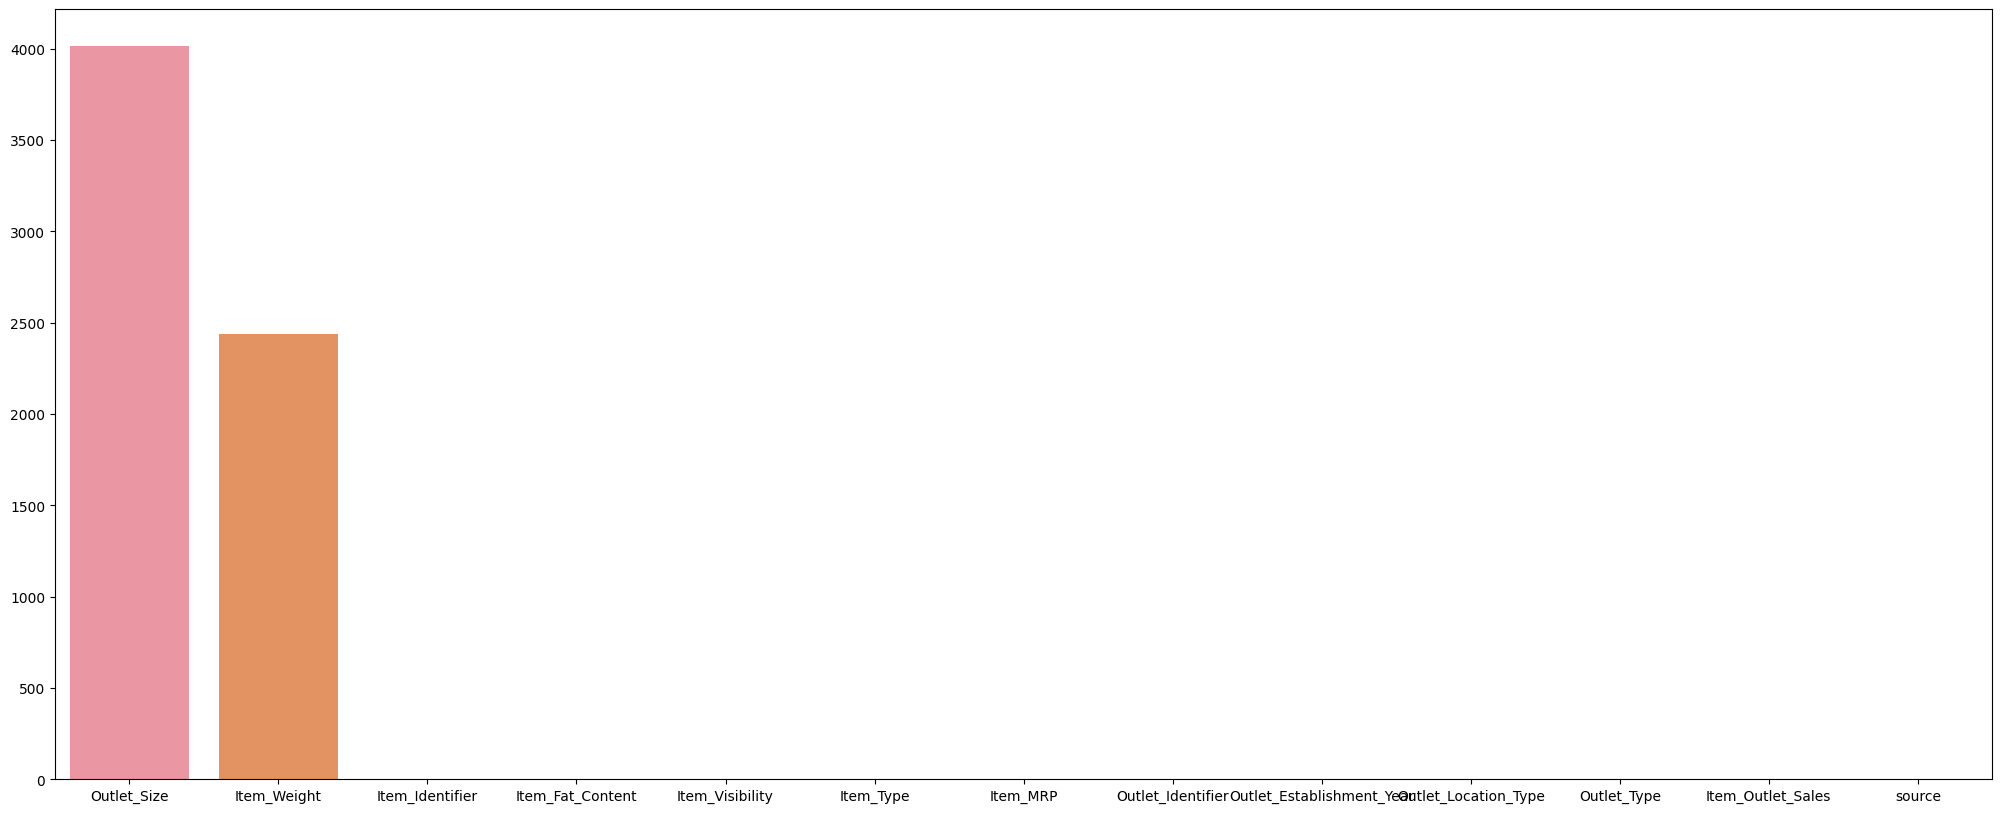

In [13]:
plt.figure(figsize = (25,10))
sns.barplot(x = number_nullvalue.index,y = number_nullvalue.values)

**We can see null value appear only in `Item_Weight` and `Outlet_Identifier` column** 😅

## Outlier value

In [14]:
outlier_columns = []
for col in describe_df.columns:
    Q1,Q2,Q3 = describe_df.loc['25%',col],describe_df.loc['50%',col],describe_df.loc['75%',col]
    IQR = Q3 - Q1
    
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR
    outlier_data = df[(df[col] > upper) | (df[col] < lower)].index
    if len(outlier_data) > 0:
        outlier_columns.append(col)
    display(f"{col} has {len(outlier_data)} outlier values")

'Item_Weight has 0 outlier values'

'Item_Visibility has 261 outlier values'

'Item_MRP has 0 outlier values'

'Outlet_Establishment_Year has 0 outlier values'

'Item_Outlet_Sales has 465 outlier values'

In [15]:
outlier_columns

['Item_Visibility', 'Item_Outlet_Sales']

**`Item_Visibility` and `Item_Outlet_Sales` has outlier value but `Item_Outlet_Sales` is target so we process only `Item_Visibility` column** 😉

## Verify Incosistent Value 

In [16]:
category_col = [col for col in df.columns if df[col].dtype == 'O']
category_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'source']

`Item_Identifier` is id for indentify product so we don't have any consistent value in this columns

In [17]:
for col in category_col:
    display(f"Column : {col}")
    display(df[col].value_counts())
    display("------------------------------------")

'Column : Item_Identifier'

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

'------------------------------------'

'Column : Item_Fat_Content'

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

'------------------------------------'

'Column : Item_Type'

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

'------------------------------------'

'Column : Outlet_Identifier'

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

'------------------------------------'

'Column : Outlet_Size'

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

'------------------------------------'

'Column : Outlet_Location_Type'

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

'------------------------------------'

'Column : Outlet_Type'

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

'------------------------------------'

'Column : source'

train    8523
test     5681
Name: source, dtype: int64

'------------------------------------'

**We can see `Item_Fat_Content` has consistent value**

## Skewness

In [18]:
df.skew()

C:\Users\Acer\AppData\Local\Temp\ipykernel_14600\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Item_Weight                  0.101309
Item_Visibility              1.195175
Item_MRP                     0.130728
Outlet_Establishment_Year   -0.396465
Item_Outlet_Sales            1.544684
dtype: float64

**`Item_Visibility` need to process the skewness** 😊

# Visualization

In [19]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

In [20]:
numeric_feature = [col for col in df.columns if df[col].dtype != "O"]
category_feature = [col for col in df.columns if df[col].dtype == "O"]
display(f"numeric_feature : {numeric_feature}") 
display(f"category_feature : {category_feature}")

"numeric_feature : ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']"

"category_feature : ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'source']"

In [21]:
# importing packages 
import seaborn as sns 
import matplotlib.pyplot as plt
  
# current colot palette


C:\Users\Acer\AppData\Local\Temp\ipykernel_14600\4287418928.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(ax=ax[0],data = df.dropna(),x = 'Item_Weight',kde=True,palette='bright')
C:\Users\Acer\AppData\Local\Temp\ipykernel_14600\4287418928.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax = ax[2],data = df['Item_MRP'],shade = True,color='green')


Text(0.5, 1.0, 'Item_MRP')

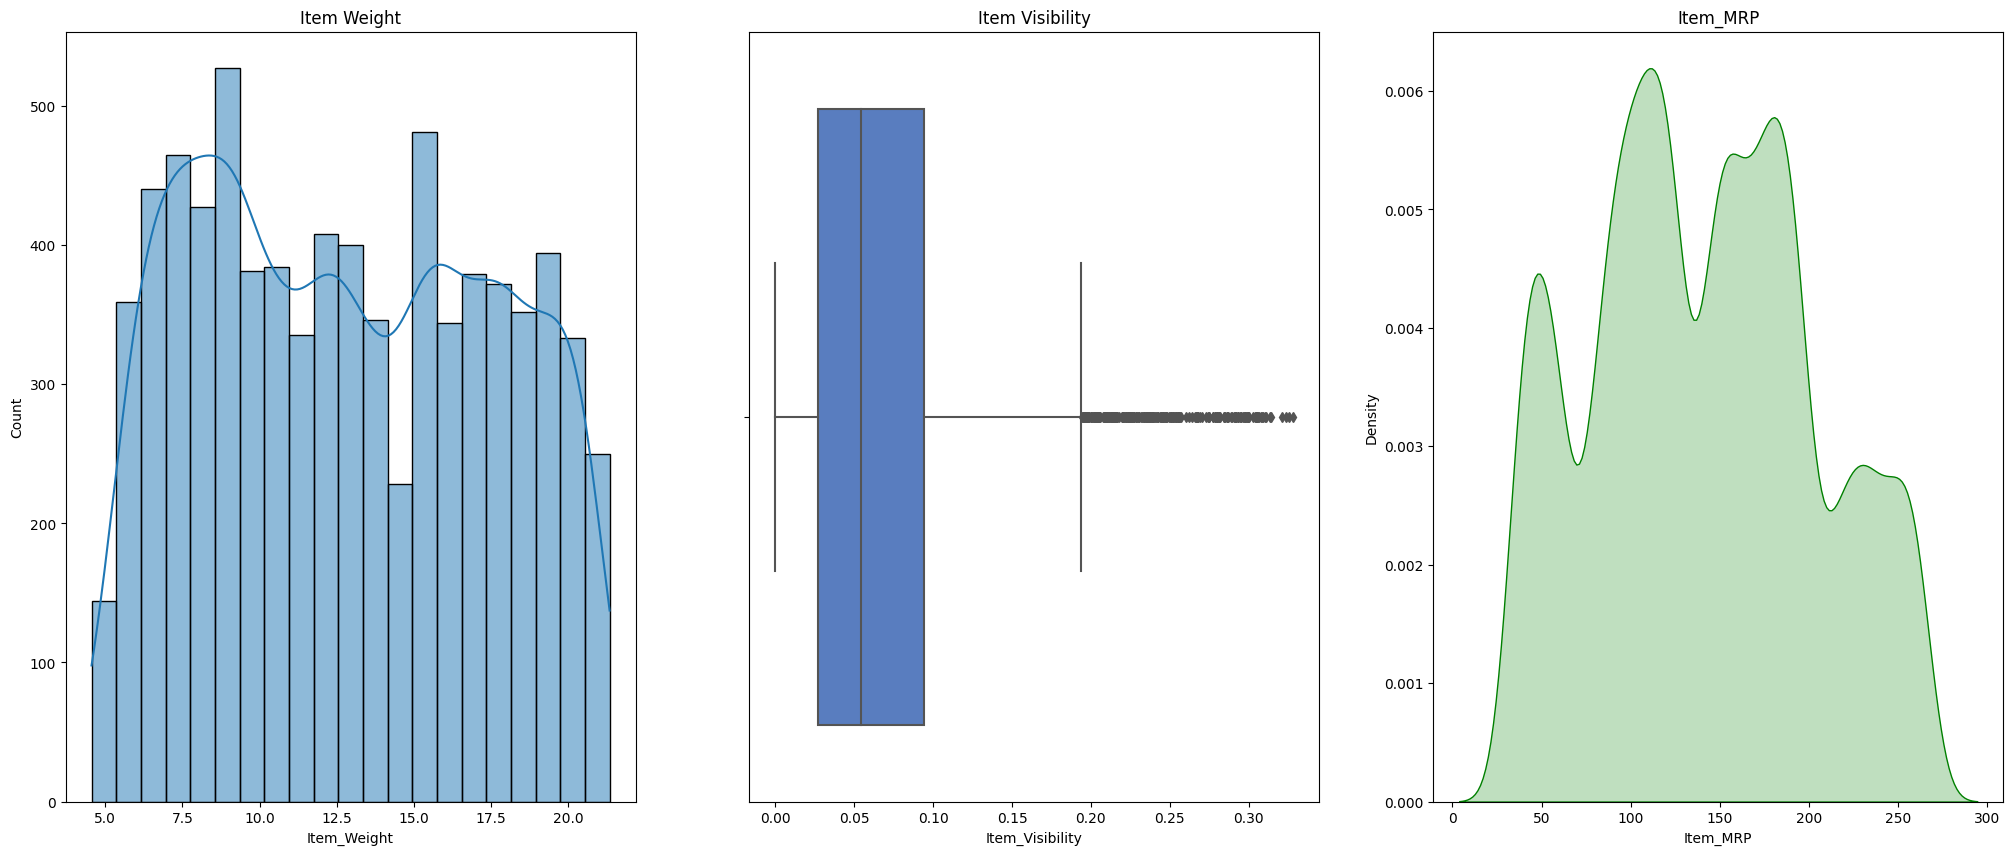

In [22]:
fig,ax = plt.subplots(nrows=1,ncols=3, figsize=(25,10))
# Item_Weight
# Note : can use histplot for many column have Nan value
sns.histplot(ax=ax[0],data = df.dropna(),x = 'Item_Weight',kde=True,palette='bright')
ax[0].set_title('Item Weight')

# Item_Visibility
sns.boxplot(ax = ax[1],data=df, x ='Item_Visibility',color='blue',palette='muted')
ax[1].set_title('Item Visibility')

# Item_MRP
sns.kdeplot(ax = ax[2],data = df['Item_MRP'],shade = True,color='green')
ax[2].set_title('Item_MRP')

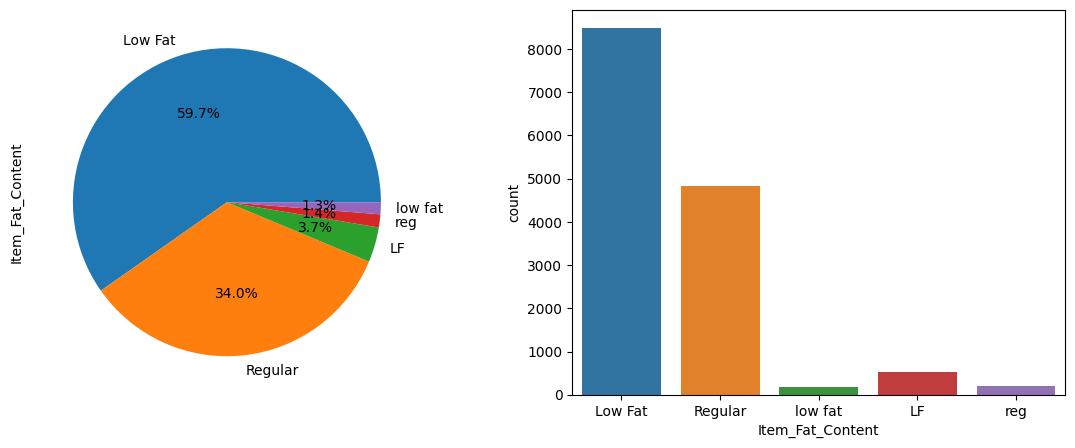

In [23]:
# Category
feature = 'Item_Fat_Content'
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
df[feature].value_counts().plot.pie(autopct = "%1.1f%%")
plt.subplot(1,2,2)
sns.countplot(x = feature,data=df)
plt.show()

**We can see `low fat`,`LF`,`reg` is inconsitent data**

<AxesSubplot: xlabel='Outlet_Location_Type', ylabel='count'>

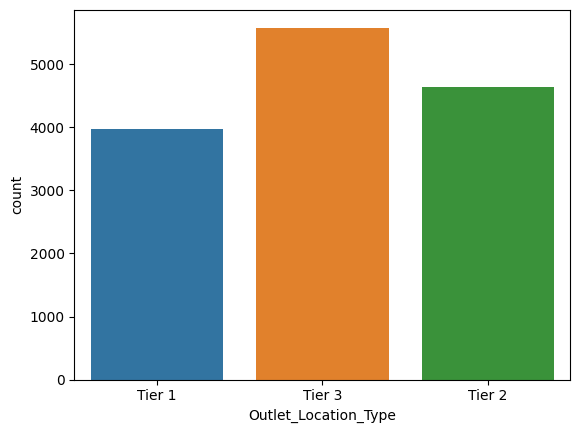

In [24]:
feature = 'Outlet_Location_Type'
sns.countplot(data = df,x = feature)

In [25]:
category_feature

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'source']

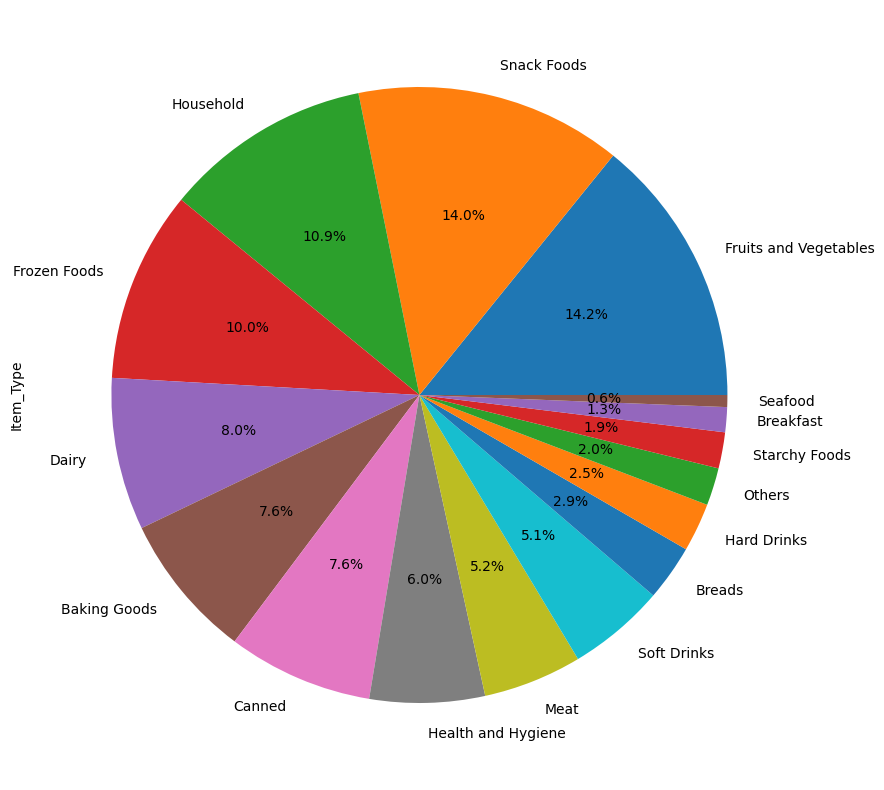

In [26]:
plt.figure(figsize=(15,10))
feature = 'Item_Type'
df[feature].value_counts().plot.pie(autopct = "%1.1f%%")
plt.show()

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,All
Outlet_Location_Type,,,,,
Tier 1,880,3100,0,0,3980
Tier 2,0,4641,0,0,4641
Tier 3,925,1553,1546,1559,5583
All,1805,9294,1546,1559,14204


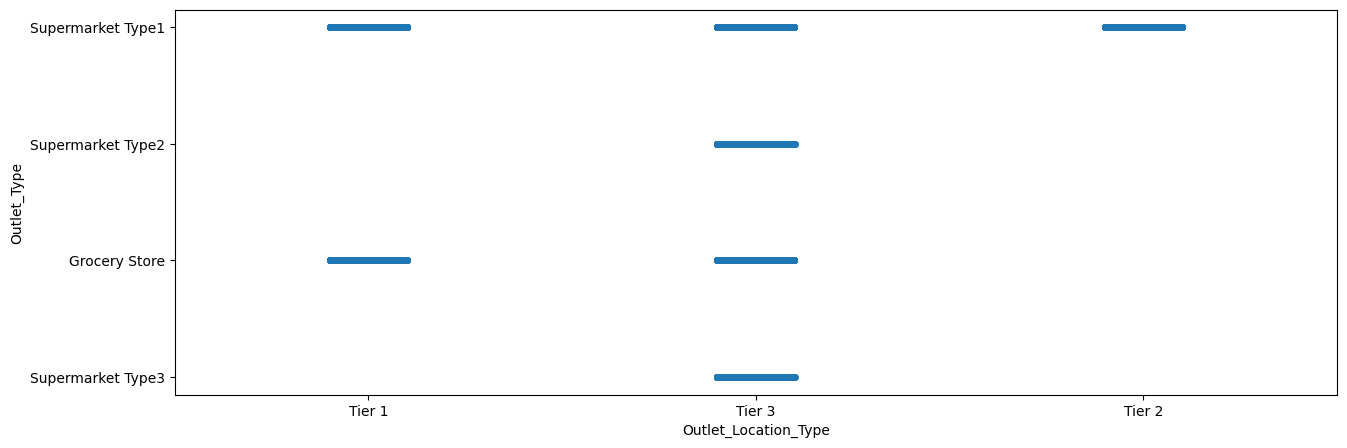

In [27]:
feature1 = 'Outlet_Location_Type'
feature2 = 'Outlet_Type'
display(pd.crosstab(df[feature1],df[feature2],margins = True))
plt.figure(figsize = (15,5))
sns.stripplot(data = df,x = feature1,y = feature2)
plt.show()

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,All
Item_Visibility,,,,,
0.0,103,577,103,96,879
0.003574698,0,0,0,1,1
0.003589104,0,1,0,0,1
0.003591414,0,1,0,0,1
0.003592093,0,1,0,0,1
...,...,...,...,...,...
0.32111501,1,0,0,0,1
0.323637245,1,0,0,0,1
0.325780807,1,0,0,0,1


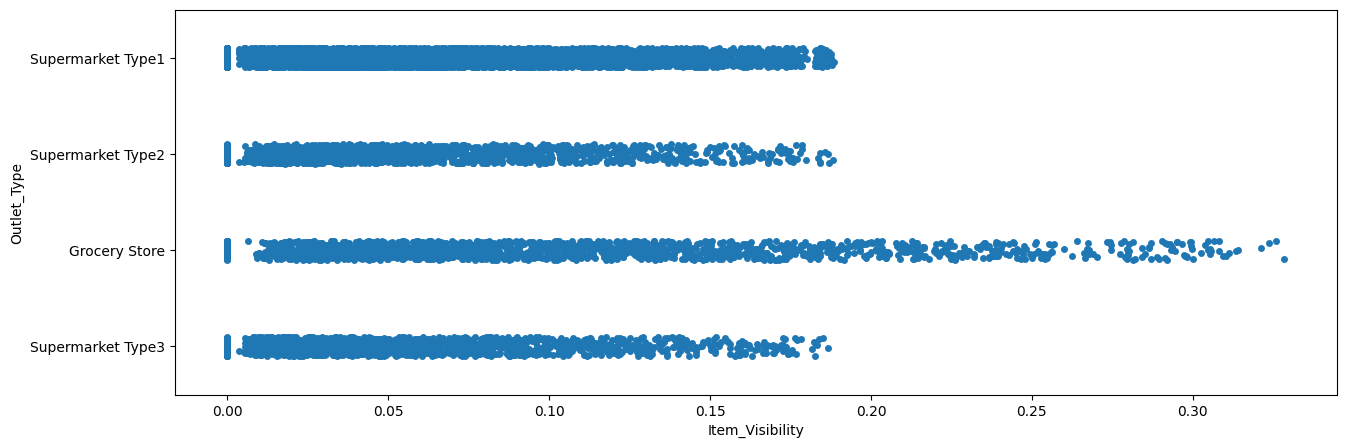

In [28]:
feature1 = 'Item_Visibility'
feature2 = 'Outlet_Type'
display(pd.crosstab(df[feature1],df[feature2],margins = True))
plt.figure(figsize = (15,5))
sns.stripplot(x = df[feature1],y = df[feature2])
plt.show()

In [29]:
numeric_feature

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

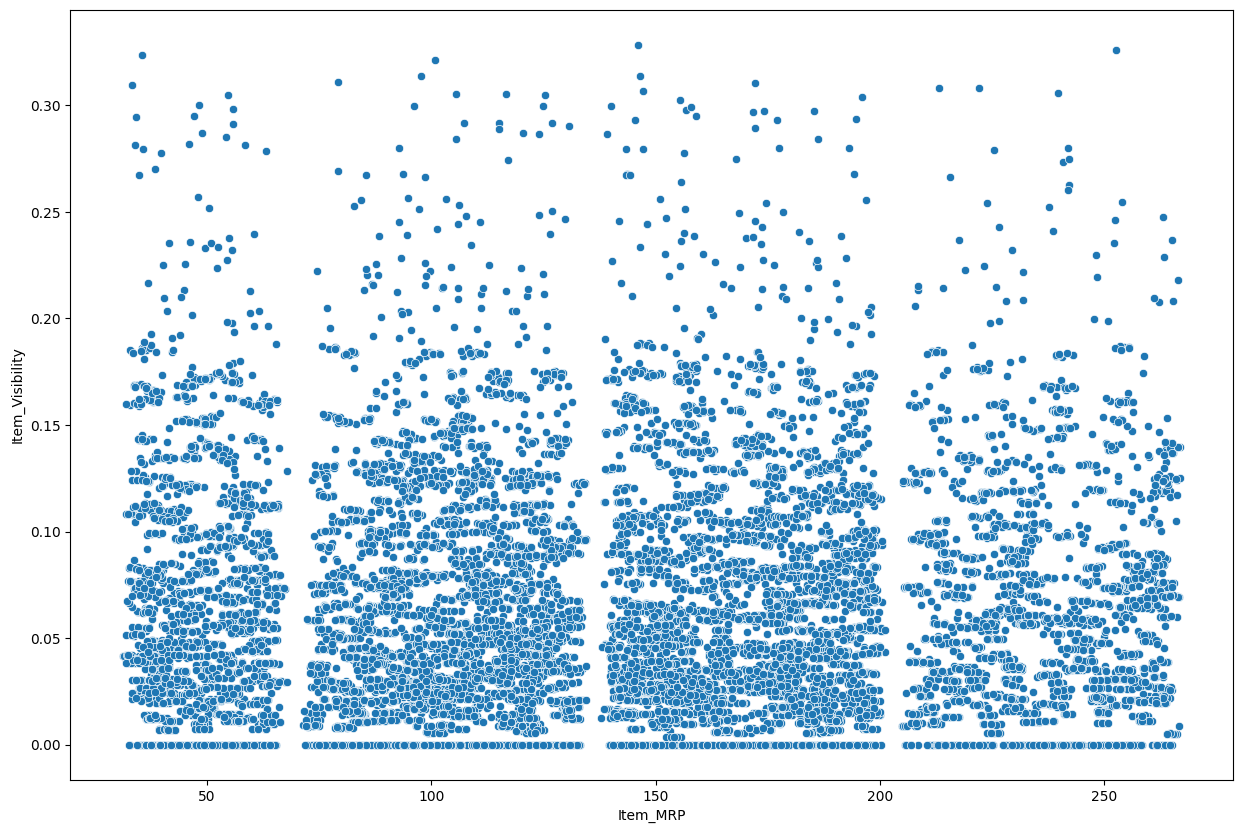

In [30]:
feature1 = 'Item_Visibility'
feature2 = 'Item_MRP'
plt.figure(figsize = (15,10))
sns.scatterplot(data = df,x = feature2,y = feature1,)
plt.show()

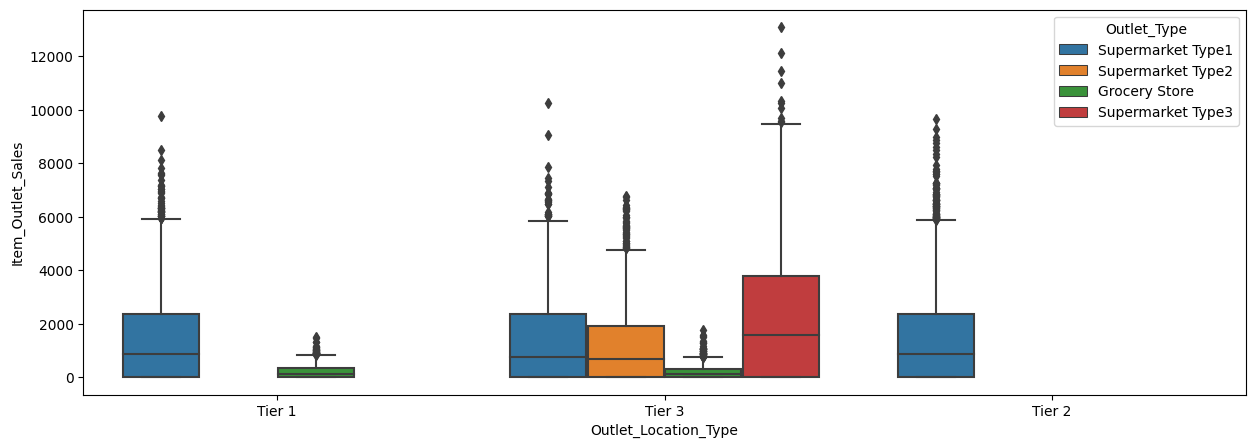

In [31]:
feature1 = 'Outlet_Location_Type'
feature2 = 'Item_Outlet_Sales'
feature3 = 'Outlet_Type'

plt.figure(figsize = (15,5))
sns.boxplot(data = df,x = feature1, y = feature2,hue = feature3)
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_14600\160018146.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


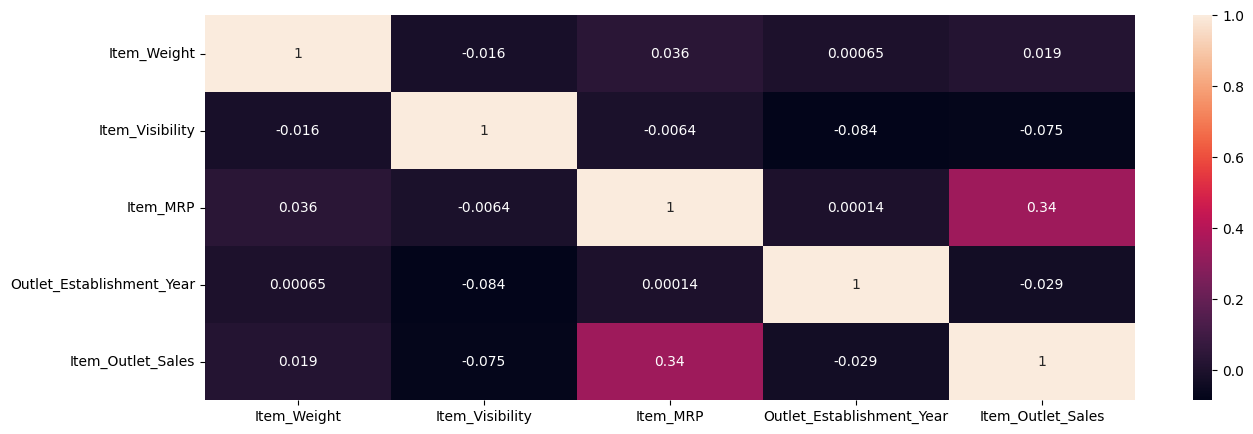

In [32]:
plt.figure(figsize = (15,5))
sns.heatmap(df.corr(),annot = True)
plt.show()

# Feature Engineering

## Inconsistent

We had seen `Item_Fat_Content` is inconsistent before => handle inconsistent in `Item_Fat_Content`

In [33]:
feature = 'Item_Fat_Content'
df[feature].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [34]:
df[feature].replace(to_replace = 'LF',value = 'Low Fat',inplace=True)
df[feature].replace(to_replace= 'low fat',value = 'Low Fat',inplace=True)
df[feature].replace(to_replace= 'reg',value = 'Regular',inplace = True)

In [35]:
df[feature].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

## Missing value

In [36]:
check_null_val = pd.DataFrame(df.isnull().sum(),columns=['Number_null_value'])
check_null_val

,Number_null_value
Item_Identifier,0
Item_Weight,2439
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,4016
Outlet_Location_Type,0


In [37]:
feature_null_val = list(check_null_val[check_null_val['Number_null_value'] > 0].index)
feature_null_val

['Item_Weight', 'Outlet_Size']

### Item_Weight

In [38]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [39]:
null_feature = 'Item_Weight'
pivot_feature = 'Item_Identifier'
table_weight = df.pivot_table(values= null_feature,index= pivot_feature, aggfunc = 'mean')
table_weight.head(),table_weight.shape

(                 Item_Weight
 Item_Identifier             
 DRA12                 11.600
 DRA24                 19.350
 DRA59                  8.270
 DRB01                  7.390
 DRB13                  6.115,
 (1559, 1))

In [40]:
table_weight.index

Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

**Replace null value by mean of all product had same `Item_Identifier`**

In [41]:
index_null_val = list(df[df[null_feature].isnull() == True].index)
len(index_null_val)

2439

In [42]:
replace_series ={idx:table_weight.loc[df.loc[idx,'Item_Identifier'],'Item_Weight'] for idx in index_null_val}
replace_series

{7: 19.0,
 18: 8.26,
 21: 8.315,
 23: 15.5,
 29: 14.5,
 36: 20.2,
 38: 6.385,
 39: 15.25,
 49: 10.195000000000002,
 59: 5.94,
 62: 6.215,
 63: 15.5,
 64: 17.5,
 77: 13.35,
 83: 18.85,
 84: 12.6,
 87: 20.2,
 95: 7.93,
 98: 12.15,
 101: 20.6,
 108: 9.395,
 112: 6.69,
 113: 6.195,
 130: 12.0,
 132: 12.15,
 136: 18.25,
 153: 9.5,
 161: 21.35,
 168: 14.6,
 178: 9.395,
 180: 14.0,
 182: 10.0,
 184: 6.215,
 186: 11.1,
 194: 17.6,
 198: 15.6,
 199: 4.615,
 203: 10.3,
 208: 5.175,
 225: 9.06,
 227: 8.93,
 229: 16.7,
 230: 6.36,
 231: 5.365,
 235: 9.3,
 236: 17.6,
 238: 7.05,
 239: 11.8,
 250: 18.35,
 255: 6.4,
 275: 19.35,
 279: 17.85,
 282: 9.0,
 284: 11.1,
 291: 10.695,
 294: 20.2,
 300: 17.35,
 301: 20.2,
 313: 13.0,
 319: 5.98,
 320: 9.3,
 328: 18.0,
 331: 15.1,
 333: 13.8,
 334: 15.6,
 335: 21.1,
 340: 17.2,
 344: 18.75,
 357: 19.35,
 359: 8.985,
 364: 17.7,
 370: 15.1,
 371: 18.35,
 380: 20.35,
 381: 18.2,
 388: 14.65,
 393: 13.35,
 400: 10.895,
 404: 15.6,
 405: 6.8,
 409: 18.85,
 417: 1

In [43]:
df[null_feature] = df[null_feature].fillna(replace_series)

In [44]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

### Outlet_Size

In [45]:
null_feature = 'Outlet_Size'
df[null_feature].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [46]:
df[null_feature].replace(np.NaN,'Unknown',inplace=True)
df[null_feature].value_counts() 

Medium     4655
Unknown    4016
Small      3980
High       1553
Name: Outlet_Size, dtype: int64

**Imput null by group feature have high corr with column**

In [47]:
feature = "Outlet_Size"
feature_cmp = "Outlet_Type"
display(df[feature].value_counts())
table = df.pivot_table(values = feature,index = feature_cmp,aggfunc  =(lambda x : mode(x).mode[0]))
display(table)
df[feature].replace("Unknown","Small",inplace = True)
display(df[feature].value_counts())

Medium     4655
Unknown    4016
Small      3980
High       1553
Name: Outlet_Size, dtype: int64

C:\Users\Acer\AppData\Local\Temp\ipykernel_14600\254953241.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  table = df.pivot_table(values = feature,index = feature_cmp,aggfunc  =(lambda x : mode(x).mode[0]))
C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


,Outlet_Size
Outlet_Type,
Grocery Store,Unknown
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


Small     7996
Medium    4655
High      1553
Name: Outlet_Size, dtype: int64

In [48]:
# Check number null value after impute
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

### Item_Visibility

**Value in Item_Visibility equals 0 => it means null val**

In [49]:
feature = 'Item_Visibility'
null_val = df[df[feature] == 0]
len(null_val)

879

In [50]:
df[feature].replace(to_replace=0,value=np.nan,inplace=True)

In [51]:
df[feature].isnull().sum()

879

**Using mean of item visibility of item_type in each outlet type to impute mean**

In [52]:
feature1 = "Item_Type"
feature2 = "Outlet_Type"
table_weight = df.pivot_table(values = feature, index = feature1, columns = feature2, aggfunc = "mean")
display(table)

,Outlet_Size
Outlet_Type,
Grocery Store,Unknown
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


In [53]:
index_null = list(df[df[feature].isnull()].index)
len(index_null)

879

In [54]:
replace_Nan = {idx : table_weight.loc[df.loc[idx,feature1],df.loc[idx,feature2]] for idx in index_null}
replace_Nan

{3: 0.11482041604508196,
 4: 0.057773584386554624,
 5: 0.06820630164814814,
 10: 0.06712286710406504,
 32: 0.0655840844854369,
 33: 0.06757858803149606,
 46: 0.055021476279773156,
 60: 0.06750319383743841,
 72: 0.06673038879878049,
 79: 0.06616748249554896,
 107: 0.06669243444817073,
 114: 0.06757858803149606,
 144: 0.0654494379438717,
 156: 0.06820630164814814,
 175: 0.1116115009090909,
 212: 0.06557787661282467,
 214: 0.09928847342408377,
 216: 0.11482041604508196,
 219: 0.05867607597954545,
 228: 0.06616748249554896,
 307: 0.06418416345454545,
 349: 0.06465468023423424,
 370: 0.06675767216019418,
 379: 0.0654494379438717,
 386: 0.06616748249554896,
 388: 0.06512608674396135,
 411: 0.09928847342408377,
 423: 0.06900015771052632,
 447: 0.06929896191666667,
 472: 0.06675767216019418,
 478: 0.06669243444817073,
 482: 0.0654494379438717,
 499: 0.057773584386554624,
 500: 0.057773584386554624,
 505: 0.06820630164814814,
 520: 0.0654494379438717,
 535: 0.06712286710406504,
 545: 0.11248355

In [55]:
# Impute NaN
df[feature].fillna(replace_Nan,inplace=True)

In [56]:
df[feature].isnull().sum()

0

In [57]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.114820,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.057774,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


## Oulier Handling

In [58]:
outlier_columns

['Item_Visibility', 'Item_Outlet_Sales']

**`Item_Outlet_Sales` is output so we must handle `Item_Visibility`**

In [59]:
feature = "Item_Visibility"
q1,q2,q3 =np.quantile(df[feature].values,0.25),np.quantile(df[feature].values,0.5),np.quantile(df[feature].values,0.75)
iqr = q3 - q1
lower_bound,upper_bound = q1 - 1.5*iqr,q3 + 1.5*iqr
# Getting outlier data
outlier_data = df[(df[feature] < lower_bound) | (df[feature]> upper_bound)].index
print(f"Number of outlier value in {feature} is {len(outlier_data)}")
df = df.drop(outlier_data)
df.shape

Number of outlier value in Item_Visibility is 274


(13930, 13)

## Skew

In [60]:
df.skew()

C:\Users\Acer\AppData\Local\Temp\ipykernel_14600\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Item_Weight                  0.098637
Item_Visibility              0.778393
Item_MRP                     0.129996
Outlet_Establishment_Year   -0.416124
Item_Outlet_Sales            1.517896
dtype: float64

<AxesSubplot: xlabel='Item_Visibility', ylabel='Count'>

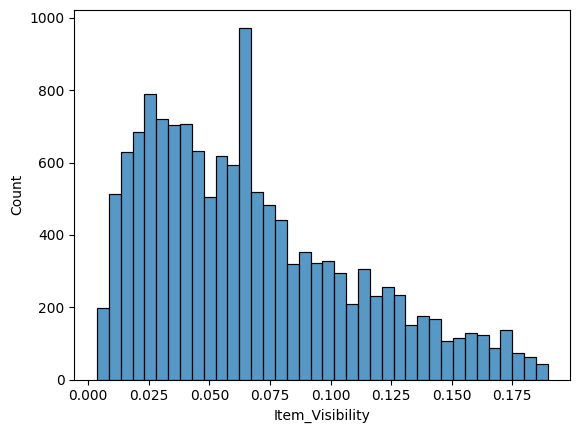

In [61]:
sns.histplot(df['Item_Visibility'])

**We need to reducre skew in this feature**

<AxesSubplot: xlabel='Item_Visibility', ylabel='Count'>

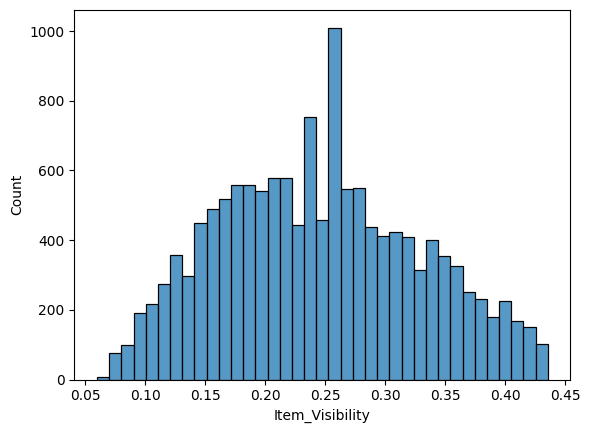

In [62]:
feature = 'Item_Visibility'
df[feature] = np.sqrt(df[feature])
sns.histplot(df[feature])

In [63]:
# Step 4. Feature Engineering : 
# Skewness/Inconsistent/Missing/Outlier Handling, 
# Feature Enrichment, Feature Transformation, Feature Selection, Feature Encoding, 
# Feature Scaling (Normalization & Standardization)

## Feature Enrichment

In [64]:
# Caculate age of each store
date_time = datetime.now()
df['Age'] = date_time.year - df['Outlet_Establishment_Year']
df['Age']

0        23
1        13
2        23
3        24
4        35
         ..
14199    25
14200    13
14201    20
14202    15
14203    20
Name: Age, Length: 13930, dtype: int64

**Remove feature `Outlet_Establishment_Year`**

In [65]:
df.drop('Outlet_Establishment_Year',axis = 1,inplace=True)
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales', 'source',
       'Age'],
      dtype='object')

## Feature Transformation

In [66]:
df['Item_Identifier']

0        FDA15
1        DRC01
2        FDN15
3        FDX07
4        NCD19
         ...  
14199    FDB58
14200    FDD47
14201    NCO17
14202    FDJ26
14203    FDU37
Name: Item_Identifier, Length: 13930, dtype: object

**Remove digit in `Item_Identifier` 😆**

In [67]:
feature = 'Item_Identifier'
df[feature] = df[feature].apply(lambda x : x[:-2])

In [68]:
df[feature]

0        FDA
1        DRC
2        FDN
3        FDX
4        NCD
        ... 
14199    FDB
14200    FDD
14201    NCO
14202    FDJ
14203    FDU
Name: Item_Identifier, Length: 13930, dtype: object

## Feature Selection

In [69]:
target = 'Item_Outlet_Sales'
df.corr()[target].sort_values(ascending=False)

C:\Users\Acer\AppData\Local\Temp\ipykernel_14600\421261944.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()[target].sort_values(ascending=False)


Item_Outlet_Sales    1.000000
Item_MRP             0.345988
Age                  0.040005
Item_Weight          0.020073
Item_Visibility     -0.041740
Name: Item_Outlet_Sales, dtype: float64

**In this project, we will use all of features**

## Feature Encoding

**We do not use `source` for train => remove source to encode**

In [70]:
encode_col = [col for col in category_col if col != 'source']
dict_encode = {}
for col in encode_col:
    encode = LabelEncoder()
    df[col] = encode.fit_transform(df[[col]])
    dict_encode[col] = encode

C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

In [71]:
# Check encode have done
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Age
0,19,9.30,0,0.126678,4,249.8092,9,1,0,1,3735.1380,train,23
1,2,5.92,1,0.138846,14,48.2692,3,1,2,2,443.4228,train,13
2,32,17.50,0,0.129461,10,141.6180,9,1,0,1,2097.2700,train,23
3,42,19.20,1,0.338852,6,182.0950,0,2,2,0,732.3800,train,24
4,48,8.93,0,0.240361,9,53.8614,1,0,2,1,994.7052,train,35


## Scaling

In [72]:
scaler_column = [col for col in df.columns if col != 'source' and col != target]
scaler_column

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Age']

In [73]:
dict_scaler = {}
for col in scaler_column:
    scaler = StandardScaler()
    df[col] = scaler.fit_transform(df[[col]])
    dict_scaler[col] = scaler

In [74]:
# Check columns is scaled
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Age
0,-1.041168,-0.752825,-0.737102,-1.425593,-0.768335,1.751709,1.49517,-0.646175,-1.379913,-0.286105,3735.1380,train,-0.124732
1,-2.167590,-1.479171,1.356664,-1.278981,1.606975,-1.495094,-0.62823,-0.646175,1.094144,0.985978,443.4228,train,-1.321781
2,-0.179787,1.009316,-0.737102,-1.392063,0.656851,0.008752,1.49517,-0.646175,-1.379913,-0.286105,2097.2700,train,-0.124732
3,0.482814,1.374637,1.356664,1.130860,-0.293273,0.660836,-1.68993,0.812930,1.094144,-1.558188,732.3800,train,-0.005027
4,0.880375,-0.832336,-0.737102,-0.055836,0.419320,-1.405004,-1.33603,-2.105280,1.094144,-0.286105,994.7052,train,1.311727


In [75]:
# Step 5. Dataset Partition : 
# Train Test Split 
# Step 6. Data Modelling : 
# Try many ML methods
# Step 7. Data Evaluation : 
# Display Metrics for Classification (Accuracy, Precision, Recall), 
# Display Metrics for Regression (R2Score, MSE, RMSE)
# Step 8. Hyper-parameter Tuning : 
# Tuning parameters: Cross Validation (CV), GridSearchCV, Regularization (L1, L2 penalty)
# Step 9. Build the pipeline with the best Model with the best parameters
# Choose best hyper-parameters and build best models
# Step 10. Conclusion

# Data Partition

## Train and Test Split data

In [76]:
target = 'Item_Outlet_Sales'
target

'Item_Outlet_Sales'

In [84]:
X= df[df['source'] == 'train'].drop(columns = [target,'source'])
y = df.loc[X.index,target]

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)
len(X_train),len(X_test),len(y_train),len(y_test)

(5854, 2509, 5854, 2509)

# Data Modelling

In [79]:
dict_model = {'LinearRegression' : LinearRegression(),
              'RandomForestRegressor' : RandomForestRegressor(),
              'LinearRegression':LinearRegression(),
              'LassoCV' : LassoCV(),
              'DecisionTreeRegressor' : DecisionTreeRegressor(),
              'ExtraTreesRegressor' : ExtraTreesRegressor()
              }

In [100]:
result = {'Name':[],'RMSE' : [],'MSE' : [],'MAE' :[]}
for i,(name,model) in enumerate (dict_model.items()):
    print(f"-----{name}-----")
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    result['Name'].append(name)
    result['RMSE'].append(mean_squared_error(y_true = y_test,y_pred=y_pred,squared=False))
    result['MSE'].append(mean_squared_error(y_true = y_test,y_pred=y_pred,squared=True))
    result['MAE'].append(mean_squared_error(y_true=y_test,y_pred=y_pred))

-----LinearRegression-----
-----RandomForestRegressor-----
-----LassoCV-----
-----DecisionTreeRegressor-----
-----ExtraTreesRegressor-----


In [102]:
result_df = pd.DataFrame(result)
result_df

,Name,RMSE,MSE,MAE
0,LinearRegression,1208.356785,1.460126e+06,1.460126e+06
1,RandomForestRegressor,1151.455879,1.325851e+06,1.325851e+06
2,LassoCV,1208.545053,1.460581e+06,1.460581e+06
3,DecisionTreeRegressor,1583.822730,2.508494e+06,2.508494e+06
4,ExtraTreesRegressor,1165.511695,1.358418e+06,1.358418e+06


In [103]:
# Sort df by RMSE
result_df.sort_values(by = 'RMSE')

,Name,RMSE,MSE,MAE
1,RandomForestRegressor,1151.455879,1.325851e+06,1.325851e+06
4,ExtraTreesRegressor,1165.511695,1.358418e+06,1.358418e+06
0,LinearRegression,1208.356785,1.460126e+06,1.460126e+06
2,LassoCV,1208.545053,1.460581e+06,1.460581e+06
3,DecisionTreeRegressor,1583.822730,2.508494e+06,2.508494e+06


**We are going to choose `RandomForestRegressor` model in this project 😆**

## Hyper-parameter Tuning

In [104]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [105]:
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [110]:
best_params = rf_random.best_params_
best_params

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

**Save best params**

In [120]:

with open('best_pram.json', 'w') as fp:
    json.dump(best_params, fp, indent=4)

**Create model with best params**

In [117]:
best_model = RandomForestRegressor()
best_model.set_params(**best_params)
best_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                      n_estimators=1600)

In [118]:
# Test data with best model
y_pred_best = best_model.predict(X_test)
print(f"RMSE: {mean_squared_error(y_test,y_pred_best,squared=False)}")
print(f"MSE: {mean_squared_error(y_test,y_pred_best,squared=True)}")
print(f"MAE: {mean_squared_error(y_test,y_pred_best)}")

RMSE: 1088.38409728877
MSE: 1184579.9432310904
MAE: 1184579.9432310904
